# Machine Learning on Polutions from Transportation
In the following program, we would guide you through using Pandas to process the emission data for Tensorflow Machine Learning. Then we would teach you how to create and train your Tensorflow model. Answer the questions when you see <u>Q</u>; follow the steps in **To-do**. When you see something like $^{D1}$ or $^{M1}$ next to problems, you should refer to the rubrics to see how the the problems will be graded as those problems are worth points.

**Note: Hit the "Run" button to run the program block by block. We don't recommend you to use "Run All" in "Cell" because the first few blocks only need to be run once and they take some time to run.**

## Import Libraries
The following block is used in Python to import necessary libraries. You might encounter error while trying to import tensorflow. This is becuase Tensorflow is not a default library that comes with the Python package you installed. Go to this link https://www.tensorflow.org/install/pip#system-install and follow the instructions on installing Tensorflow. If you encounter problems while trying to install Tensorflow you can add `--user` after `pip install`. This is because you did not create a virtual environment for your python packages. You can follow Step 2 on the website to create a virtual environment (recommended) or you can just install the package in your HOME environment. You might encounter error while trying to import other libraries. Please use the same `pip` method described above. 

* `pandas` is used to process our data.

* `numpy` is a great tool for mathematical processing and array creations.

* `sklearn` is used to split the data into Training, Testing, and Validation set.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split 
import seaborn as sns
from matplotlib import pyplot as plt 

### Import Tensorboard

In [2]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard
from datetime import datetime
from packaging import version

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."
import tensorboard
tensorboard.__version__

TensorFlow version:  2.6.1


'2.7.0'

## Load and Clean up the Dataset
### Load the Dataset
To process the data, save the .csv file you downloaded from the Google Drive to the same directory where this Notebook is at.
* `pd.read_csv("file path")` reads the data into emission_train

    * Note that we call `pd` directly becuase we import `pandas as pd`
    
* `.head()` returns the first 100 rows of data. Note that when displaying, some rows are truncated. It is normal since the rows are too long.

* `.describe()` shows statistical data for our data frame.

In [3]:
# loading the large data set, it may takes a while.
emission_train = pd.read_csv("UC-Emission.csv", delimiter=",", quoting = 3)

Here is a link that contains information about meaning of the columns in "emission.csv": https://sumo.dlr.de/docs/Simulation/Output/EmissionOutput.html

In [4]:
display(emission_train.head(100))
display(emission_train.describe())

,timestep_time,vehicle_CO,vehicle_CO2,vehicle_HC,vehicle_NOx,vehicle_PMx,vehicle_angle,vehicle_eclass,vehicle_electricity,vehicle_fuel,vehicle_id,vehicle_lane,vehicle_noise,vehicle_pos,vehicle_route,vehicle_speed,vehicle_type,vehicle_waiting,vehicle_x,vehicle_y
0,0.0,15.20,7380.56,0.00,84.89,2.21,50.28,HBEFA3/HDV,0.0,3.13,truck0,5329992#5_0,67.11,7.20,!truck0!var#1,0.00,truck_truck,0.0,18275.04,26987.78
1,0.0,0.00,2416.04,0.01,0.72,0.01,42.25,HBEFA3/PC_G_EU4,0.0,1.04,veh0,5330181#0_0,65.15,5.10,!veh0!var#1,14.72,veh_passenger,0.0,18279.94,24533.12
2,1.0,17.92,9898.93,0.00,103.38,2.49,50.28,HBEFA3/HDV,0.0,4.20,truck0,5329992#5_0,73.20,8.21,!truck0!var#1,1.01,truck_truck,0.0,18275.82,26988.43
3,1.0,0.00,0.00,0.00,0.00,0.00,42.25,HBEFA3/PC_G_EU4,0.0,0.00,veh0,5330181#0_0,62.72,18.85,!veh0!var#1,13.75,veh_passenger,0.0,18289.19,24543.30
4,1.0,164.78,2624.72,0.81,1.20,0.07,357.00,HBEFA3/PC_G_EU4,0.0,1.13,veh1,-5338968#2_0,55.94,5.10,!veh1!var#1,0.00,veh_passenger,0.0,29252.01,24424.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.0,23.44,2578.06,0.15,0.64,0.05,0.13,HBEFA3/LDV_G_EU6,0.0,1.11,moto2,-5341858#10_0,63.24,35.78,!moto2!var#1,11.62,moto_motorcycle,0.0,26468.26,25548.47
96,7.0,732.32,18759.70,3.34,3.79,1.19,179.93,HBEFA3/LDV_G_EU6,0.0,8.07,moto3,-342586098#36_0,81.67,30.96,!moto3!var#1,13.99,moto_motorcycle,0.0,24729.15,27450.68
97,7.0,294.68,6949.38,1.29,1.47,0.43,179.93,HBEFA3/LDV_G_EU6,0.0,2.99,moto4,5331636#0_0,72.45,11.88,!moto4!var#1,6.37,moto_motorcycle,0.0,29159.96,25066.29
98,7.0,236.07,4292.19,0.97,0.93,0.30,1.91,HBEFA3/LDV_G_EU6,0.0,1.85,moto5,5340657#0_0,71.73,5.60,!moto5!var#1,3.30,moto_motorcycle,0.0,24340.58,28198.87


,timestep_time,vehicle_CO,vehicle_CO2,vehicle_HC,vehicle_NOx,vehicle_PMx,vehicle_angle,vehicle_electricity,vehicle_fuel,vehicle_noise,vehicle_pos,vehicle_speed,vehicle_waiting,vehicle_x,vehicle_y
count,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,16331007.0,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07
mean,4.112561e+03,5.764304e+01,4.919050e+03,7.284125e-01,1.769589e+01,4.227491e-01,1.633698e+02,0.0,2.105266e+00,6.636207e+01,2.162082e+02,1.331140e+01,3.385107e+00,2.458506e+04,2.496505e+04
std,2.168986e+03,8.854365e+01,7.959043e+03,1.589816e+00,5.993168e+01,1.164065e+00,1.051232e+02,0.0,3.389028e+00,7.389330e+00,6.034189e+02,8.833069e+00,1.914152e+01,4.016049e+03,3.045771e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.258000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.960000e+00,-1.490000e+00
25%,2.291000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.031000e+01,0.0,0.000000e+00,6.249000e+01,2.383000e+01,6.550000e+00,0.000000e+00,2.219207e+04,2.349907e+04
50%,4.133000e+03,2.017000e+01,2.624720e+03,1.500000e-01,1.200000e+00,6.000000e-02,1.799600e+02,0.0,1.130000e+00,6.711000e+01,7.199000e+01,1.337000e+01,0.000000e+00,2.393805e+04,2.548033e+04
75%,5.903000e+03,1.034400e+02,6.161010e+03,7.600000e-01,2.710000e+00,1.500000e-01,2.703500e+02,0.0,2.650000e+00,7.112000e+01,1.780600e+02,1.999000e+01,0.000000e+00,2.691704e+04,2.672322e+04
max,1.441800e+04,3.932950e+03,1.153026e+05,1.729000e+01,8.864200e+02,1.432000e+01,3.600000e+02,0.0,4.888000e+01,1.019600e+02,1.943554e+04,5.013000e+01,3.970000e+02,4.492832e+04,4.753314e+04


### Visualize the Dataset
Below we use `sns.pairplot()` to show you the 2D plots between datasets. We only use 0.5% of the randomly extracted data from `emission_train` to make plots becuase using too many data might crash the program. `.sample(frac=0.01)` takes a fraction of sample from DataFrame randomly. 
* `del` frees up memory for Python. However, it won't release memory back to the computer.

From the pair plots you can visualize the relationships between the data in the dataset. For example, `vehicle_CO2` and `vehicle_fuel` have a linear relationship. `vehicle_CO2` and `vehicle_pos` have a parabolic or exponential like relationship. Some data might have a relationship that is not easily identified from pair plots.     

$^{D1}$<u>Q: What do you find from the Pairplot? Find three pairs of data and list what you observe from their pair plots.</u>

<u>Type your questions to Q:</u> 
Upon observating the various plots generated below, we observed trends between the data. Three observations include:
- We observed a directly proportional linear relationship between vehicle fuel and vehicle CO2, where vehicle fuel increased by 20 for every 50,000 increase in vehicle CO2. 
- Vehicle noise generally tends to increase with vehicle fuel, and vehicle noise also tends to increase with vehicle CO2.
- A majority of vehicle waiting tends to occur in a certain cross-section (near the center of the city),  where x-coordinates range from 20,000 to 30,000 and y-coordinates range from 20,000 to 30,000.

16331008 emission_train
816550 correlation_graph_data


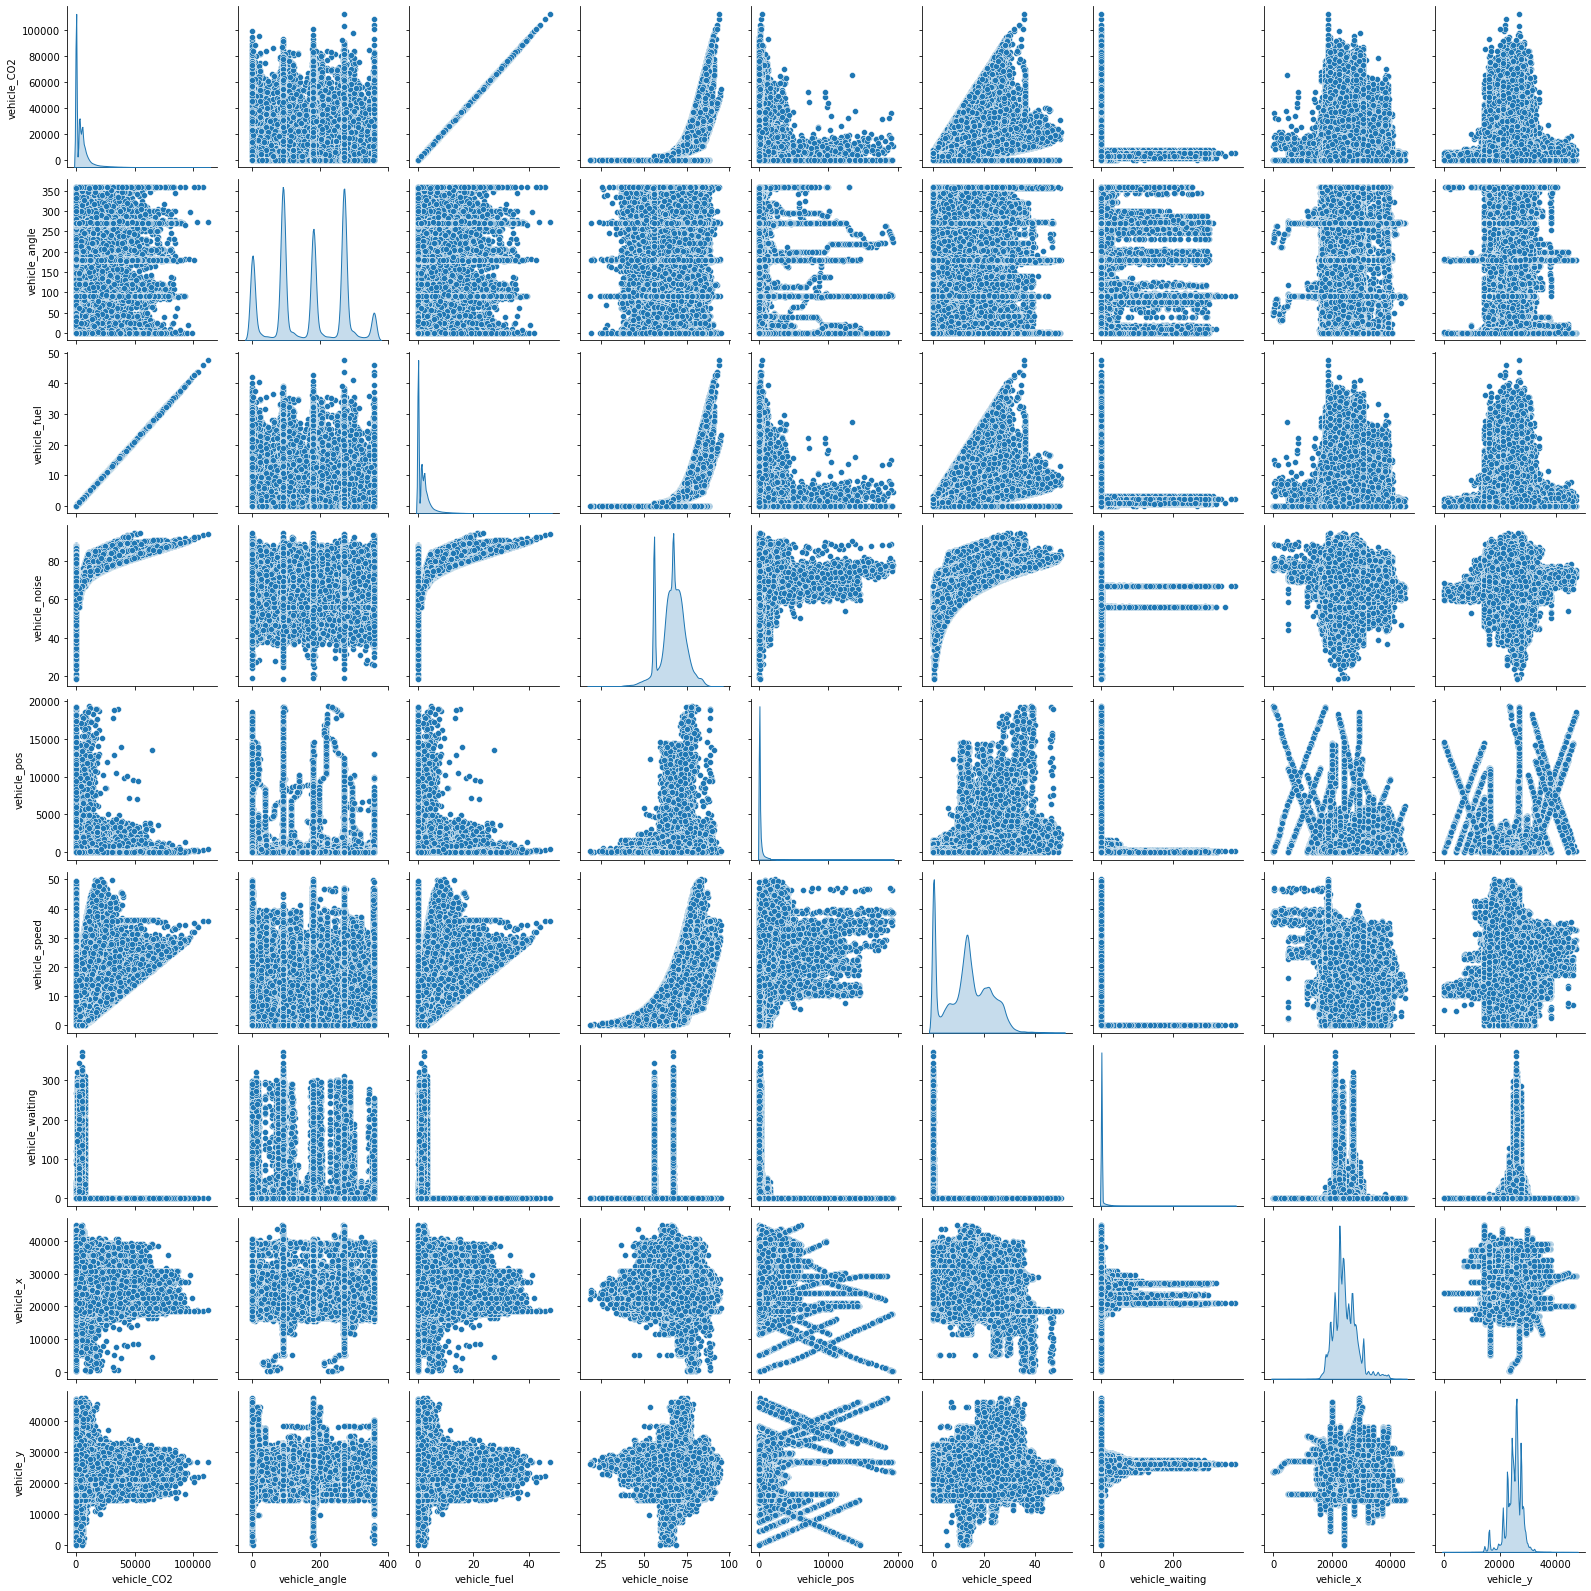

In [5]:
correlation_graph_data = emission_train.sample(frac=0.05).reset_index(drop=True)
print(len(emission_train), 'emission_train')
print(len(correlation_graph_data), 'correlation_graph_data')
sns.pairplot(correlation_graph_data[['vehicle_CO2', 'vehicle_angle', 'vehicle_fuel', 'vehicle_noise', 'vehicle_pos', 'vehicle_speed', 'vehicle_waiting', 'vehicle_x', 'vehicle_y']], diag_kind='kde')

#Free up memory for Python
del correlation_graph_data

### Clean up the Dataset
*Note that there are emission data like `vehicle_CO`, `vehicle_CO2`, `vehicle_HC`,  `vehicle_NOx`, `vehicle_PMx` in the dataset. In this lab, we only want to look at `vehicle_CO2`.*

After looking at the data, you might notice there are a lot of data we don't want for our machine learning. For example, all the `vehicle_electricity` are zeros, and `vehicle_route` data are only used to keep track of the unique route each vehicle goes through. 

Below, unwanted data are dropped. `vehicle_id` data are dropped because they are only used to keep track of different vehicles. `vehicle_lane` data are the name of the road. We dropped `vehicle_lane` data becuase we believed the data might not affect vehicle emissions. In practice, you should only drop the data if you have clear reasonings. For example `vehicle_electricity` are all zeros, so you can drop them. Even if you do not drop them, the machine learning program might be able to figure the relationship out. `vehicle_route` data are dropped due to the reasoning above. `timestep_time` data are dropped becuase they are the simulation time.

**To-do:**
1. $^{D2}$Drop the data we mentioned above. Also, drop the data that you think might not affect the machine learning. <u>Q: Provide your reasonings.</u>

<u>Type your questions to Q:</u> In addition to dropping columns `vehicle_CO`, `vehicle_HC`, `vehicle_NOx`, `vehicle_PMx`, `timestep_time`, and `vehicle_id`, we decided to drop `vehicle_route`, `vehicle_lane`, and `vehicle_electricity` since these values were respectively used to keep track of each vehicle's unique routes, the name of the road, and `vehicle_electricity` data were all zeros. Dropping these data fields will not affect `vehicle_CO2` output, and thus will not affect the machine learning.

In [6]:
emission_train = emission_train.drop(columns=["vehicle_CO", "vehicle_HC", "vehicle_NOx", "vehicle_PMx", 
                                              "timestep_time", "vehicle_id", "vehicle_route", "vehicle_lane", 
                                              "vehicle_electricity"])

We seperated the block above from the block below becuase we don't want you to run `pd.read_csv` and `emission_train.drop()` twice. Reading a large csv file as you might have experienced a few minutes ago take up quite some RAM and CPU, and running `.drop()` twice will cause an error message to be printed out.

**To-do:** 
1. $^{D3}$Display the **last** 100 rows of your new `emission_train` data. It is okay if the displayed rows are truncated in the middle. 

In [7]:
display(emission_train.head(100))
display(emission_train.describe())

### Insert your code below ###
display(emission_train.tail(100))

,vehicle_CO2,vehicle_angle,vehicle_eclass,vehicle_fuel,vehicle_noise,vehicle_pos,vehicle_speed,vehicle_type,vehicle_waiting,vehicle_x,vehicle_y
0,7380.56,50.28,HBEFA3/HDV,3.13,67.11,7.20,0.00,truck_truck,0.0,18275.04,26987.78
1,2416.04,42.25,HBEFA3/PC_G_EU4,1.04,65.15,5.10,14.72,veh_passenger,0.0,18279.94,24533.12
2,9898.93,50.28,HBEFA3/HDV,4.20,73.20,8.21,1.01,truck_truck,0.0,18275.82,26988.43
3,0.00,42.25,HBEFA3/PC_G_EU4,0.00,62.72,18.85,13.75,veh_passenger,0.0,18289.19,24543.30
4,2624.72,357.00,HBEFA3/PC_G_EU4,1.13,55.94,5.10,0.00,veh_passenger,0.0,29252.01,24424.16
...,...,...,...,...,...,...,...,...,...,...,...
95,2578.06,0.13,HBEFA3/LDV_G_EU6,1.11,63.24,35.78,11.62,moto_motorcycle,0.0,26468.26,25548.47
96,18759.70,179.93,HBEFA3/LDV_G_EU6,8.07,81.67,30.96,13.99,moto_motorcycle,0.0,24729.15,27450.68
97,6949.38,179.93,HBEFA3/LDV_G_EU6,2.99,72.45,11.88,6.37,moto_motorcycle,0.0,29159.96,25066.29
98,4292.19,1.91,HBEFA3/LDV_G_EU6,1.85,71.73,5.60,3.30,moto_motorcycle,0.0,24340.58,28198.87


,vehicle_CO2,vehicle_angle,vehicle_fuel,vehicle_noise,vehicle_pos,vehicle_speed,vehicle_waiting,vehicle_x,vehicle_y
count,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07
mean,4.919050e+03,1.633698e+02,2.105266e+00,6.636207e+01,2.162082e+02,1.331140e+01,3.385107e+00,2.458506e+04,2.496505e+04
std,7.959043e+03,1.051232e+02,3.389028e+00,7.389330e+00,6.034189e+02,8.833069e+00,1.914152e+01,4.016049e+03,3.045771e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.258000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.960000e+00,-1.490000e+00
25%,0.000000e+00,9.031000e+01,0.000000e+00,6.249000e+01,2.383000e+01,6.550000e+00,0.000000e+00,2.219207e+04,2.349907e+04
50%,2.624720e+03,1.799600e+02,1.130000e+00,6.711000e+01,7.199000e+01,1.337000e+01,0.000000e+00,2.393805e+04,2.548033e+04
75%,6.161010e+03,2.703500e+02,2.650000e+00,7.112000e+01,1.780600e+02,1.999000e+01,0.000000e+00,2.691704e+04,2.672322e+04
max,1.153026e+05,3.600000e+02,4.888000e+01,1.019600e+02,1.943554e+04,5.013000e+01,3.970000e+02,4.492832e+04,4.753314e+04


,vehicle_CO2,vehicle_angle,vehicle_eclass,vehicle_fuel,vehicle_noise,vehicle_pos,vehicle_speed,vehicle_type,vehicle_waiting,vehicle_x,vehicle_y
16330908,5293.91,1.98,HBEFA3/Bus,2.26,67.19,77.83,0.01,pt_bus,1.0,30010.68,25278.35
16330909,6541.73,2.07,HBEFA3/Bus,2.79,71.21,0.69,0.70,pt_bus,0.0,30010.69,25279.04
16330910,10387.44,2.06,HBEFA3/Bus,4.43,74.53,2.58,1.88,pt_bus,0.0,30010.71,25280.93
16330911,12058.39,1.62,HBEFA3/Bus,5.14,73.88,5.45,2.87,pt_bus,0.0,30010.74,25283.80
16330912,13307.66,1.06,HBEFA3/Bus,5.67,73.64,9.19,3.74,pt_bus,0.0,30010.78,25287.54
...,...,...,...,...,...,...,...,...,...,...,...
16331003,19817.16,0.45,HBEFA3/Bus,8.45,76.56,185.84,13.65,pt_bus,0.0,30107.48,25771.74
16331004,0.00,0.45,HBEFA3/Bus,0.00,74.14,199.17,13.33,pt_bus,0.0,30107.59,25785.07
16331005,23192.37,0.45,HBEFA3/Bus,9.89,77.18,212.90,13.73,pt_bus,0.0,30107.70,25798.80
16331006,0.00,0.45,HBEFA3/Bus,0.00,74.10,226.29,13.39,pt_bus,0.0,30107.80,25812.19


By now, you would have already done some cleanups by dropping unwanted data. Below we used a `for` loop to cast the data in `vehicle_eclass` and `vehicle_type` to string. As you might notice that the values in both columns are texts. However, we found  that the data in our csv file cannot be read correctly into Tensorflow so we added the for loop.
* `.dropna().reset_index(drop=True)` drops the rows that contain NaN in any columns and reset the row index.


**To-do:**
1. $^{D4}$Shuffle `emission_train` and save a new copy to `emission_train_shuffle`. *Hint: Look at the function we used to extract data for the correlation graph.*
2. $^{D5}$Display the first 100 rows of the shuffled data. It is okay if the displayed rows are truncated in the middle.
3. $^{D6}$Display the statistic (count, mean, std...) on the shuffled data. $^{D7}$<u>Q: Does anything change?</u>

<u>Type your answers to Q:</u>
After comparing the statistics like count, mean, std, min, 25%, 50%, 75%, and max for both the unshuffled and shuffled data, we observed no changes; the statistics remained the same when frac=1. However, if frac is set to another value, say 0.5, certain statistics like count, mean, and std change.

In [8]:
for header in ["vehicle_eclass", "vehicle_type"]:
    emission_train[header] = emission_train[header].astype(str)

emission_train = emission_train.dropna().reset_index(drop=True)

# Shuffle the dataset
emission_train_shuffle = emission_train.sample(frac=1) #FILL IN THE CODE 

### Insert your code below ###

# Display the data pre- and post- shuffle
display(emission_train.head(100))
###FILL IN THE CODE
display(emission_train_shuffle.head(100))

# Get info of the dataframe
###FILL IN THE CODE
display(emission_train_shuffle.describe())

,vehicle_CO2,vehicle_angle,vehicle_eclass,vehicle_fuel,vehicle_noise,vehicle_pos,vehicle_speed,vehicle_type,vehicle_waiting,vehicle_x,vehicle_y
0,7380.56,50.28,HBEFA3/HDV,3.13,67.11,7.20,0.00,truck_truck,0.0,18275.04,26987.78
1,2416.04,42.25,HBEFA3/PC_G_EU4,1.04,65.15,5.10,14.72,veh_passenger,0.0,18279.94,24533.12
2,9898.93,50.28,HBEFA3/HDV,4.20,73.20,8.21,1.01,truck_truck,0.0,18275.82,26988.43
3,0.00,42.25,HBEFA3/PC_G_EU4,0.00,62.72,18.85,13.75,veh_passenger,0.0,18289.19,24543.30
4,2624.72,357.00,HBEFA3/PC_G_EU4,1.13,55.94,5.10,0.00,veh_passenger,0.0,29252.01,24424.16
...,...,...,...,...,...,...,...,...,...,...,...
95,2578.06,0.13,HBEFA3/LDV_G_EU6,1.11,63.24,35.78,11.62,moto_motorcycle,0.0,26468.26,25548.47
96,18759.70,179.93,HBEFA3/LDV_G_EU6,8.07,81.67,30.96,13.99,moto_motorcycle,0.0,24729.15,27450.68
97,6949.38,179.93,HBEFA3/LDV_G_EU6,2.99,72.45,11.88,6.37,moto_motorcycle,0.0,29159.96,25066.29
98,4292.19,1.91,HBEFA3/LDV_G_EU6,1.85,71.73,5.60,3.30,moto_motorcycle,0.0,24340.58,28198.87


,vehicle_CO2,vehicle_angle,vehicle_eclass,vehicle_fuel,vehicle_noise,vehicle_pos,vehicle_speed,vehicle_type,vehicle_waiting,vehicle_x,vehicle_y
3494498,13168.95,82.87,HBEFA3/PC_G_EU4,5.66,73.90,82.76,18.35,veh_passenger,0.0,24817.42,23906.30
1623024,0.00,179.71,HBEFA3/PC_G_EU4,0.00,55.00,61.37,0.03,veh_passenger,1.0,25545.55,26364.61
15392802,3783.59,269.81,HBEFA3/PC_G_EU4,1.63,69.29,56.57,21.02,veh_passenger,0.0,25472.47,23896.86
6118589,0.00,179.97,HBEFA3/PC_G_EU4,0.00,68.33,698.16,21.36,veh_passenger,0.0,21034.27,21615.70
6056055,0.00,270.91,HBEFA3/PC_G_EU4,0.00,55.93,355.38,0.00,veh_passenger,4.0,24316.65,22671.49
...,...,...,...,...,...,...,...,...,...,...,...
4261226,0.00,89.59,HBEFA3/PC_G_EU4,0.00,66.65,51.55,17.53,veh_passenger,0.0,26406.87,25671.34
1214743,2624.72,180.81,HBEFA3/PC_G_EU4,1.13,55.94,61.11,0.00,veh_passenger,14.0,23903.65,28673.52
5616769,0.00,269.82,HBEFA3/PC_G_EU4,0.00,69.98,358.39,24.49,veh_passenger,0.0,22343.93,30848.88
4315731,0.00,92.78,HBEFA3/PC_G_EU4,0.00,66.20,11.78,18.04,veh_passenger,0.0,33980.76,16160.22


,vehicle_CO2,vehicle_angle,vehicle_fuel,vehicle_noise,vehicle_pos,vehicle_speed,vehicle_waiting,vehicle_x,vehicle_y
count,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07
mean,4.919050e+03,1.633698e+02,2.105266e+00,6.636207e+01,2.162082e+02,1.331140e+01,3.385107e+00,2.458506e+04,2.496505e+04
std,7.959043e+03,1.051232e+02,3.389028e+00,7.389330e+00,6.034189e+02,8.833069e+00,1.914152e+01,4.016049e+03,3.045771e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.258000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.960000e+00,-1.490000e+00
25%,0.000000e+00,9.031000e+01,0.000000e+00,6.249000e+01,2.383000e+01,6.550000e+00,0.000000e+00,2.219207e+04,2.349907e+04
50%,2.624720e+03,1.799600e+02,1.130000e+00,6.711000e+01,7.199000e+01,1.337000e+01,0.000000e+00,2.393805e+04,2.548033e+04
75%,6.161010e+03,2.703500e+02,2.650000e+00,7.112000e+01,1.780600e+02,1.999000e+01,0.000000e+00,2.691704e+04,2.672322e+04
max,1.153026e+05,3.600000e+02,4.888000e+01,1.019600e+02,1.943554e+04,5.013000e+01,3.970000e+02,4.492832e+04,4.753314e+04


In [9]:
emission_train_shuffle = emission_train.sample(frac=0.5) #Re-set frac value
display(emission_train.describe())
display(emission_train_shuffle.describe())

,vehicle_CO2,vehicle_angle,vehicle_fuel,vehicle_noise,vehicle_pos,vehicle_speed,vehicle_waiting,vehicle_x,vehicle_y
count,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07,1.633101e+07
mean,4.919050e+03,1.633698e+02,2.105266e+00,6.636207e+01,2.162082e+02,1.331140e+01,3.385107e+00,2.458506e+04,2.496505e+04
std,7.959043e+03,1.051232e+02,3.389028e+00,7.389330e+00,6.034189e+02,8.833069e+00,1.914152e+01,4.016049e+03,3.045771e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.258000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.960000e+00,-1.490000e+00
25%,0.000000e+00,9.031000e+01,0.000000e+00,6.249000e+01,2.383000e+01,6.550000e+00,0.000000e+00,2.219207e+04,2.349907e+04
50%,2.624720e+03,1.799600e+02,1.130000e+00,6.711000e+01,7.199000e+01,1.337000e+01,0.000000e+00,2.393805e+04,2.548033e+04
75%,6.161010e+03,2.703500e+02,2.650000e+00,7.112000e+01,1.780600e+02,1.999000e+01,0.000000e+00,2.691704e+04,2.672322e+04
max,1.153026e+05,3.600000e+02,4.888000e+01,1.019600e+02,1.943554e+04,5.013000e+01,3.970000e+02,4.492832e+04,4.753314e+04


,vehicle_CO2,vehicle_angle,vehicle_fuel,vehicle_noise,vehicle_pos,vehicle_speed,vehicle_waiting,vehicle_x,vehicle_y
count,8.165504e+06,8.165504e+06,8.165504e+06,8.165504e+06,8.165504e+06,8.165504e+06,8.165504e+06,8.165504e+06,8.165504e+06
mean,4.921919e+03,1.633716e+02,2.106493e+00,6.636633e+01,2.159762e+02,1.331476e+01,3.378195e+00,2.458414e+04,2.496435e+04
std,7.961815e+03,1.051265e+02,3.390209e+00,7.389488e+00,6.027552e+02,8.833251e+00,1.910088e+01,4.014307e+03,3.043376e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.258000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.347000e+01,-1.490000e+00
25%,0.000000e+00,9.031000e+01,0.000000e+00,6.250000e+01,2.381000e+01,6.560000e+00,0.000000e+00,2.219297e+04,2.350058e+04
50%,2.624720e+03,1.799600e+02,1.130000e+00,6.711000e+01,7.197000e+01,1.338000e+01,0.000000e+00,2.393900e+04,2.547792e+04
75%,6.165463e+03,2.703500e+02,2.650000e+00,7.112000e+01,1.779000e+02,2.000000e+01,0.000000e+00,2.691534e+04,2.672219e+04
max,1.126353e+05,3.600000e+02,4.775000e+01,9.796000e+01,1.943053e+04,5.013000e+01,3.960000e+02,4.492832e+04,4.753314e+04


## *Stop*
*Before you proceed, make sure you finish reading "Machine Learning Introduction" in Step 3 of the lab. You should complete the Tensorflow playground exercise and take a screenshot of your results.*   

## Split Data for Machine Learning
In machine learning, we often want to split our data into Training Set, Validation Set, and Test Set.
* **Training Set**:
Training Set is used to train our machine learning model while the Validation and Test Set aren't. 
* **Validation Set**:
Having a Validation Set prevents overfitting of our machine learning model. Overfitting is when our model is tuned perfectly for a specific set of data, but is fitted poorly for other set of data. Take our traffic emission data for example. If the data predicts $CO_2$ emission data within 10 mse (mean squared error) from Training Set, but predicts emission data over 50 mse from Validation data. Then we could see that the model is overfitted.
* **Test Set**:
Test set is used to evaluate the final model.

A typical workflow will be: 
1. Train your model using *Training Set*.
2. Validate your model using *Validation Set*.
3. Adjust your model using results from *Validation Set*.
4. Pick the model that produces best results from using *Validation Set*.
5. Confirm your model with *Test Set*.

**To-Do:**
1. Don't change the `test_size=0.99` in the first split. 
2. Tweak the `test_size=` values for spilitting `train_df`, `test_df`, and `val_df`.
3. You will come back and change some codes after you finish your first training. Instructions will be provided in the "Train the Model" section.

In [10]:
# train_df, backup_df = train_test_split(emission_train_shuffle, test_size=0.99) # Comment this line for large data training
# Edit the test_size below.

train_df, test_df = train_test_split(emission_train_shuffle, test_size=0.1) # Uncomment for large dataset
# train_df, test_df = train_test_split(train_df, test_size=0.1) # Comment for large dataset
train_df, val_df = train_test_split(train_df, test_size=0.2)

# print(len(backup_df), 'backup data')
print(len(train_df), 'train examples')
print(len(val_df), 'validation examples')
print(len(test_df), 'test examples')

# del emission_train

5879162 train examples
1469791 validation examples
816551 test examples


## Normalize the Input Data (Optional)
Sometimes when there are huge value differences between input features, we want to scale them to get a better training result. In this lab you are not required to use normalization. But if you cannot get a nice machine learning result, you can try normalizing the data. Below, we used Z normalization. It is just a normalization method. If you normalize your trainning data, make sure to also **normalize the validation and test data**. Note that `train_df_norm = train_df` won't copy `train_df` to `train_df_norm`. Changing the values in `train_df_norm` will affect the values in `train_df`. So if you decide to revert the normalization after you run the code block below, run the code block under "Split Data for Machine Learning" again and run only the `train_df_norm = train_df` below. (Comment out the code using `#` sign.)

**Z Normalization Equation:** 
\begin{equation*}
z = \frac{x - \mu}{\sigma} \\
z: \text{Normalized Data} \\
x: \text{Original Data} \\
\mu: \text{Mean of }x \\
\sigma: \text{Standard Deviation of }x \\
\end{equation*}

In [11]:
# Z-Score Normalizing
# train_df_norm = train_df

# for header in ["vehicle_electricity", "vehicle_fuel", "vehicle_noise", "vehicle_speed", "vehicle_waiting"]:
    
#     train_df_norm[header] = (train_df[header] - train_df[header].mean()) / train_df[header].std()
#     train_df_norm[header] = train_df_norm[header].fillna(0)

### Insert your code below (optional) ###
# Normalize the validation data


# Normalize the test data


# print(train_df_norm.head())

## Organize Features
### Classify Features
We need to define our feature columns so that the program knows what type of features are used in the training. In emission data, there are two types of features: numeric (floating point, int, etc.) and categorical/indicator (for example, 'color', 'gender'; 'color' column can contain 'red', 'blue', etc.). 

**To Do:**
1. $^{M1}$Organize the numeric columns. Also fill in the numeric columns' names in your dataset. Remember that you dropped some values already. Only put the names of the columns that are still in your dataset. Refer to "Classify structured data with feature columns" under "Tensorflow Tutorials" section on the Tensorflow website. Link: https://www.tensorflow.org/tutorials/structured_data/feature_columns  

In [12]:
# Create an empty list
feature_cols = []


# Numeric Columns
numeric_col_names = ["vehicle_fuel", "vehicle_speed"]
for header in numeric_col_names: ### Finish the list on the left
    ### Insert your code ###
    numeric_column = tf.feature_column.numeric_column(header)
    feature_cols.append(numeric_column)

# Indicator Columns
indicator_col_names = ["vehicle_type"] # removed "vehicle_eclass"
for col_name in indicator_col_names:
    categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(col_name, 
                                                                                   train_df[col_name].unique())
    indicator_column = tf.feature_column.indicator_column(categorical_column)
    feature_cols.append(indicator_column)

print("Feature columns: ", feature_cols, "\n")

Feature columns:  [NumericColumn(key='vehicle_fuel', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='vehicle_speed', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='vehicle_type', vocabulary_list=('moto_motorcycle', 'veh_passenger', 'bus_bus', 'truck_truck', 'pt_bus'), dtype=tf.string, default_value=-1, num_oov_buckets=0))] 



### Create a Feature Layer
Feature layer will the input to our machine learning. We need to create a feature layer to be added into the machine learning model. 

In [13]:
# Create a feature layer for tf
feature_layer = tf.keras.layers.DenseFeatures(feature_cols, name='Features')

## Create and Train the Model
### Create Model
* `model.add()`: add layer to model
    
* In `tf.keras.layers.Dense()`
    
    * `units`: number of nodes in that layer
        
    * `activation`: activation function used in that layer
        
    * `kernel_regularizer`: regularization function used in that layer
        
    * `name`: is just for us to keep track and debug
        
* In `model.compile()`

    * `optimizer=tf.keras.optimizers.Adam(lr=learning_rate)`: Used to improve performance of the training

    * `Adam`: stochastic gradient descent method

    * `loss`: update the model according to specified loss function 

    * `metrics`: evaluate the model according specified metrics
    
### Train the Model    
* We first split our Pandas dataframe into features and labels.

* Then `model.fit()` trains our model.

* `logdir`, `tensorboard_callback` is to save training logs to be used in Tensorboard.

* Notice that there are 2 `model.fit()` function calls with one being commented out. The one without `callbacks=[tensorboard_callback]` is used in this program for large dataset training. 

### Instructions for Training Small and Large Data
As we mentioned in the lab document, hyperparameters affect the performance of your model. In the following blocks, you would be training your model. We also want you to experience training both a small dataset and a large dataset. 

**To-do:**


* **Small Dataset:**

    1. The program cells you ran until now prepare you for small dataset training. You don't need to adjust the `test_size=0.99` in "Split Data for Machine Learning". 
    2. Adjust the Hyperparameters (learning rate, batch size, epochs, hidden layer number, node number). Add in additional hidden layers as needed. Remember, a large learning rate might cause the model to never converge, but a very small learning rate would cause the model to converge very slow. If your mse (mean squared error) is decreasing but your program finishes before the mse reaches a small number, increase your epochs. Lastly, start with a small batch size. Smaller batch size often gives a better training result. A large batch size often causes poor convergence, and it might also lead to poor generalization and slow training speed. Try batch sizes of 100, 500, 1000.
    3. In the function definitions (previous code block):
        * Press the stop button (**interrupt the kernal**) next to Run before you change the values in the functions above. 
        * Add or reduce Hidden layers if your model turns our poorly. 
        * Adjust the amount of nodes in each Hidden layer. 
        * Try out different activation functions. 
        * Try different regularizers. 
        * You should aim to get an **mse < 100**. **Note, we will grade your results based on mse.**
    4. $^{M2}$Once you get a result with nice mse, run the block `%tensorboard --logdir logs`. Then take screenshots that show your **epoch_loss** and your **epoch_mse**.
        * **Screenshot showing Epoch Loss** <img src="./screenshots/epoch_loss_small.png">
        * **Screenshot showing Epoch MSE** <img src="./screenshots/epoch_mse_small.png">
        
* **Large Dataset:**
    1. Adjust the codes in "Split Data for Machine Learning" so that no data go to `backup_df`.
    
    2. Go to previous code block and use the `model.fit()` without `callbacks=[tensorboard_callback]`. Remember to comment out the one with `callbacks=[tensorboard_callback]`.
    
    3. Adjust the Hyperparameters (learning rate, batch size, epochs, hidden layer number, node number). Remember, a large learning rate might cause the model to never converge, but a very small learning rate would cause the model to converge very slow. If your mse (mean squared error) is decreasing but your program finishes before the mse reaches a small number, increase your epochs. Smaller batch size often gives a better training result. A large batch size often causes poor convergence, and it might also lead to poor generalization and slow training speed. Try batch sizes of 1000, 10000, 200000. $^{M3}$<u>Q: Do you notice any difference between using batch sizes of 1000, 10000, 200000?</u>
    
    4. In the function definitions:
        * Press the stop button (**interrupt the kernal**) next to Run before you change the values in the functions above. 
        * Add or reduce Hidden layers if your model turns our poorly. 
        * Adjust the amount of nodes in each Hidden layer. 
        * Try out different activation functions. 
        * Try different regularizers. 
        * You should aim to get an **mse < 200**. **Note, we will grade your results based on mse.**
        
    5. $^{M4}$The program will run for a longer time with large dataset input. Once you get a result with nice mse, you don't have to run `%tensorboard --logdir logs`. Move on to sections below. We would have you save a PDF once you reach the end of this Notebook. We will look at your training for the large dataset based on the logs printed out during each epoch.
    

*Note: Ignore the warnings at the beginning and at the end.*

<u>Type your answers to Q:</u>

In [ ]:
# Hyperparameters
learning_rate = 0.003 ### FILL IN A NUMBER 
epochs = 50 ### FILL IN A NUMBER
batch_size = 1000 ### FILL IN A NUMBER

# Label 
label_name = "vehicle_CO2"
shuffle = True

#---Create a sequential model---#
model = tf.keras.models.Sequential([
    # Add the feature layer
    feature_layer,

    # First hidden layer with 10 nodes
    tf.keras.layers.Dense(units=10, 
                          activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1(l=0.03),
                          name='Hidden1'),

    # Additional hidden layers
    tf.keras.layers.Dense(units=7, 
                          activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1(l=0.03),
                          name='Hidden2'),
    
    tf.keras.layers.Dense(units=4, 
                          activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1(l=0.03),
                          name='Hidden3'),
    
    # Output layer
    tf.keras.layers.Dense(units=1,  
                          activation='linear',
                          name='Output')

])


model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mse'])


#---Train the Model---#
# Keras TensorBoard callback.
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
print(logdir)
train_lbl = np.array(train_df["vehicle_CO2"])
train_df = train_df.drop(columns=["vehicle_CO2"])
# Split the datasets into features and label.
train_ft = {name:np.array(value) for name, value in train_df.items()}
# train_lbl = np.array(train_ft.pop(label_name))

val_lbl =  np.array(val_df["vehicle_CO2"])
val_df = val_df.drop(columns=["vehicle_CO2"])
val_ft = {name:np.array(value) for name, value in val_df.items()}


# Keras TensorBoard callback.
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
print(logdir)
# model.fit(x=train_ft, y=train_lbl, batch_size=batch_size,
#           epochs=epochs, callbacks=[tensorboard_callback], validation_data=(val_ft, val_lbl), shuffle=shuffle)

# Training function for large training set
model.fit(x=train_ft, y=train_lbl, batch_size=batch_size,
          epochs=epochs, verbose=2, validation_data=(val_ft, val_lbl), shuffle=shuffle)

logs/fit/20211120-133616


/Users/madhusivaraj/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


logs/fit/20211120-133617
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
5880/5880 - 560s - loss: 3465182.5000 - mse: 3465174.0000 - val_loss: 1091.4564 - val_mse: 1085.4222
Epoch 2/50
5880/5880 - 595s - loss: 888.1376 - mse: 882.1226 - val_loss: 926.4603 - val_mse: 920.4796
Epoch 3/50
5880/5880 - 585s - loss: 906.0444 - mse: 900.0984 - val_loss: 963.7112 - val_mse: 957.7884
Epoch 4/50
5880/5880 - 469s - loss: 908.4231 - mse: 902.5154 - val_loss: 882.6423 - val_mse: 876.7368
Epoch 5/50
5880/5880 - 443s - loss: 907.9506 - mse: 902.0450 - val_loss: 947.8404 - val_mse: 941.9402
Epoch 6/50
5880/5880 - 450s - loss: 905.8015 - mse: 899.9045 - val_loss: 846.5602 - val_mse: 840.6654
Epoch 7/50
5880/5880 - 444s - loss: 903.1592 - mse: 897.2653 - val_loss: 970.7174 - val_mse: 964.8259
Epoch 8/50
5880/5880 - 462s - loss: 906.3904 - mse: 900.5033 - val_loss: 912.6920 - va

### Evaluate the Model with Test Data
Below you will evaluate the performance of your model using the test data.

In [25]:
test_lbl = np.array(test_df["vehicle_CO2"])
test_df = test_df.drop(columns=["vehicle_CO2"])
test_ft = {key:np.array(value) for key, value in test_df.items()}
# test_lbl = np.array(test_ft.pop(label_name))
print("Model evaluation: \n")
model.evaluate(x=test_ft, y=test_lbl, batch_size=batch_size)

Model evaluation: 

82/82 [==============================] - 1s 10ms/step - loss: 122.9596 - mse: 116.6831


[122.95962524414062, 116.6830825805664]

In [26]:
#Get a summary of your model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Features (DenseFeatures)     multiple                  0         
_________________________________________________________________
Hidden1 (Dense)              multiple                  80        
_________________________________________________________________
Hidden2 (Dense)              multiple                  77        
_________________________________________________________________
Hidden3 (Dense)              multiple                  32        
_________________________________________________________________
Output (Dense)               multiple                  5         
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________


## Use the Trained-Model and Visualize the results
Below we provide you with tables and figures for you to visualize your training results. 

### TensorBoard
From TensorBoard, you can see the loss and mse curve of your training. Go to graph and under "Tag", select "keras". You can see your network. Note that you will see error under "Tag: Default". You can ignore the warning. 

In [31]:
%tensorboard --logdir logs

### Predict $CO_{2}$ From Trained-Model
Below, your trained-model is used to make prediction on the test set. Remember, test set is not used in training the model so it would give you a nice indication of how your model is doing. 
* `.predict()`: predicts the output values from features given.

* `predicted_labels`: contains the values ($CO_{2}$) our model predicts.
After the predicted and actual values are obtained. We create a plot for you to visualize the results. The dots show the predicted values and the line shows the targeted values. 

Consider rewriting this model with the Functional API.
CPU times: user 4min 9s, sys: 4.3 s, total: 4min 13s
Wall time: 3min 52s


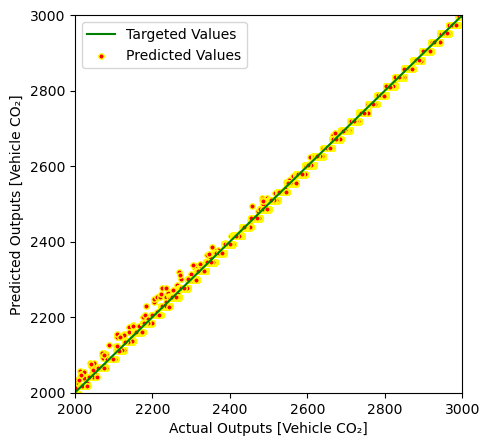

In [28]:
%%time
# Get the features from the test set
test_features = test_ft
# Get the actual CO2 output for the test set 
actual_labels = test_lbl

# Make prediction on the test set
predicted_labels = model.predict(x=test_features).flatten()

# Define the graph
Figure1 = plt.figure(figsize=(5,5), dpi=100)
plt.xlabel('Actual Outputs [Vehicle CO\u2082]')
plt.ylabel('Predicted Outputs [Vehicle CO\u2082]')
plt.scatter(actual_labels, predicted_labels, s=15, c='Red', edgecolors='Yellow', label='Predicted Values')

# Take the output data from 2000 to 3000 as an instance to visualize 
lims = [2000, 3000]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, color='Green', label='Targeted Values')
plt.legend()


### Error Count Histogram
Below, the graph shows a Histogram of errors between predicted and actual values. If the error counts locate mostly around 0, the trained-model is pretty accurate.

Text(0, 0.5, 'Count')

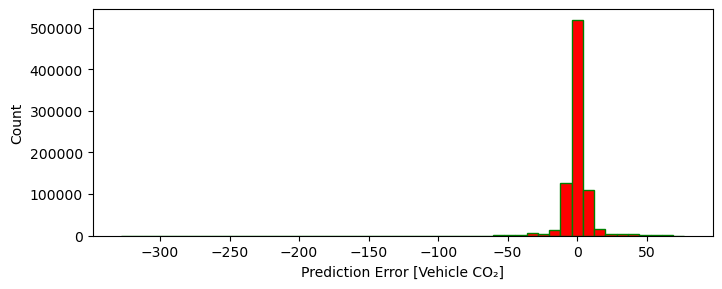

In [29]:
error = actual_labels - predicted_labels
Figure2 = plt.figure(figsize=(8,3), dpi=100)
plt.hist(error, bins=50, color='Red', edgecolor='Green')
plt.xlabel('Prediction Error [Vehicle CO\u2082]')
plt.ylabel('Count')

### Table of Actual and Predicted Values
Below, a table puts the actual and predicted values side by side. Html is used in this case. 

In [30]:
from IPython.display import HTML, display

def display_table(data_x, data_y):
    html = "<table>"
    html += "<tr>"
    html += "<td><h3>%s</h3><td>"%"Actual Vehicle CO\u2082"
    html += "<td><h3>%s</h3><td>"%"Predicted Vehicle CO\u2082"
    html += "</tr>"
    for i in range(len(data_x)):
        html += "<tr>"
        html += "<td><h4>%s</h4><td>"%(int(data_x[i]))
        html += "<td><h4>%s</h4><td>"%(int(data_y[i]))
        html += "</tr>"
    html += "</table>"
    display(HTML(html))
    
display_table(actual_labels[0:100], predicted_labels[0:100])

## Well Done!
**Congradulation on finishing the lab. Please click on "File -> Print Preview" and a separate page should open. Press Cmd/Ctrl + p to print. Select "Save as PDF". Submit this .ipnyb Notebook file, the PDF, and loss graph screenshots to the link specified in the Google Doc.**  